In [68]:
# communication channel setup
import serial
import serial.tools.list_ports
VID = 61525
PID = 38912
ports = serial.tools.list_ports.comports()
device = None
for p in ports:
    if p.vid == VID and p.pid == PID:
        try:
            device = serial.Serial(p.device)
        except serial.SerialException:
            print('Reconnect the controller unit.')
if device is None:
 raise Exception('No suitable device detected.')


In [69]:
vdc = 12
cmd_setvdc = 'dz' + str(int(vdc*100)).zfill(4) + '\r'
device.write(bytes(cmd_setvdc, 'utf-8'))

7

In [89]:
ns = 64 # samples per cycle; 64 generally enough
freq = 2000 # frequency
amp = 0.5 # amplitude
offset = 0 # offset
cmd_gensin = 's100' # W1 sinusoidal
cmd_gensin += str(ns).zfill(3) + str(freq).zfill(7) + str(int(amp*100)).zfill(4) \
 + str(int(offset*100)).zfill(4) + '\r'
device.write(bytes(cmd_gensin, 'utf-8'))


23

In [90]:
# waveform generation
device.write(bytes(cmd_gensin, 'utf-8')) # use the command string created earlier


23

In [91]:
fs = 200000 # sampling frequency
c1 = 0 # CH1 DC coupling mode; 0 for signals within around ±1 V
gain1 = 138 # CH1 gain; set the range of voltage that can be read
dco1 = 130 # CH1 offset; set the zero level
c2 = 0 # CH2 DC coupling mode
gain2 = 138 # CH2 gain
dco2 = 130 # CH2 offset
cmd_readosc = 'm1' + str(fs).zfill(6) + str(c1) + str(gain1).zfill(3) + \
 str(dco1).zfill(3) + str(c2) + str(gain2).zfill(3) + \
 str(dco2).zfill(3) + '\r'


In [92]:
bytedata = bytearray(4000) # create a byte array of size 4000
device.reset_input_buffer() # clear data in input buffer
device.write(bytes(cmd_readosc, 'utf-8'))
device.readline() # skip line containing the command string
device.readinto(bytedata)


4000

In [93]:
import numpy as np
data = np.frombuffer(bytedata, dtype='uint16').reshape((2, 1000))

In [94]:
t = np.arange(1000)/fs

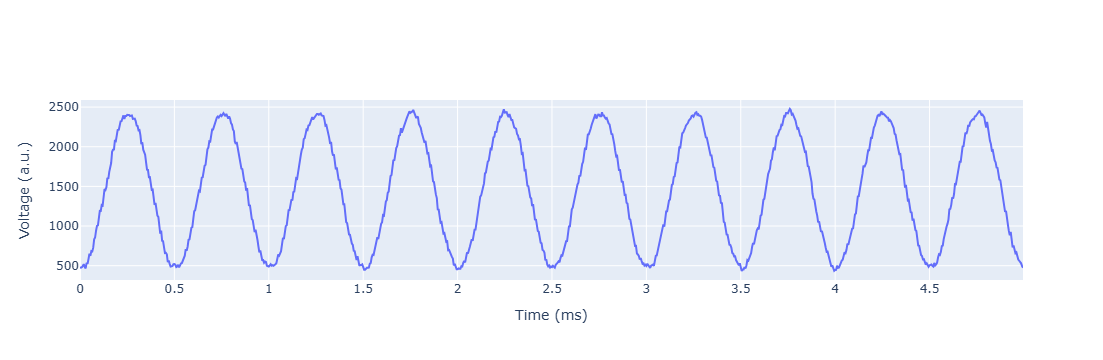

In [96]:
import plotly
fig = plotly.graph_objs.Figure()
fig.add_trace(plotly.graph_objs.Scatter(x=t*1e3, y=data[0, :]))
fig.update_layout(xaxis_title='Time (ms)', yaxis_title='Voltage (a.u.)')